In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,balanced_accuracy_score, ConfusionMatrixDisplay, make_scorer, roc_auc_score, RocCurveDisplay
from sklearn.svm import SVC

In [2]:
merged_final = pd.read_csv("C:/Users/dcsor/Desktop/Parkinson's Project/merged_all.csv")
merged_final = merged_final.dropna()
merged_final.loc[:,"GENDER_MAPPED"] = merged_final["GENDER"].map({"Male": 0, "Female": 1})


In [3]:

nhy_map = {0:0,1:1,2:1,3:1,4:1,5:1}
merged_final.loc[:,"NHY_MAPPED"] = merged_final["NHY"].map(nhy_map)
target_col = "NHY_MAPPED"

In [4]:
cols_to_include = ["GENDER_MAPPED","AGE","EDUC_YRS"]
feature_cols_demo = merged_final.columns.intersection(cols_to_include)
X_demo = merged_final[feature_cols_demo]
y = merged_final[target_col]
print("X shape:", X_demo.shape)
print("y shape:", y.shape)

X shape: (712, 3)
y shape: (712,)


Demographic Data Only


In [5]:
cols_to_include = ["GENDER_MAPPED","AGE","EDUC_YRS"]
feature_cols_demo = merged_final.columns.intersection(cols_to_include)
X_demo = merged_final[feature_cols_demo]
y = merged_final[target_col]
print("X shape:", X_demo.shape)
print("y shape:", y.shape)

X shape: (712, 3)
y shape: (712,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_demo, y, test_size=0.2, stratify=y, random_state=42
)
pipeline =  Pipeline([('scale', StandardScaler()), ('SVC', SVC(kernel = 'rbf', C=10, probability= True))])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(
    pipeline, X_train, y_train,
    cv=cv,
    scoring=make_scorer(balanced_accuracy_score),
    n_jobs=-1
)

print(f"CV balanced accuracy (train): {scores.mean():.3f} ± {scores.std():.3f}")

CV balanced accuracy (train): 0.518 ± 0.039


In [7]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]   

# Evaluate
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Asymptomatic (0)", "PD (1)"]))

Balanced Accuracy: 0.5732758620689655
                  precision    recall  f1-score   support

Asymptomatic (0)       0.61      0.25      0.35        56
          PD (1)       0.65      0.90      0.75        87

        accuracy                           0.64       143
       macro avg       0.63      0.57      0.55       143
    weighted avg       0.63      0.64      0.60       143



Demographic + MRI 

In [8]:
cols_to_include = ["GENDER_MAPPED","AGE","EDUC_YRS","lh_MeanThickness","lh_WhiteSurfArea","lhCerebralWhiteMatterVol","Left_Cerebellum_White_Matter","CerebralWhiteMatterVol","lhSurfaceHoles"]
feature_cols_demo_mri = merged_final.columns.intersection(cols_to_include)
X_demo_mri = merged_final[feature_cols_demo_mri]
y = merged_final[target_col]
print("X shape:", X_demo_mri.shape)
print("y shape:", y.shape)

X shape: (712, 9)
y shape: (712,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_demo_mri, y, test_size=0.2, stratify=y, random_state=42
)
pipeline =  Pipeline([('scale', StandardScaler()), ('SVC', SVC(kernel = 'rbf', C=10, probability= True))])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(
    pipeline, X_train, y_train,
    cv=cv,
    scoring=make_scorer(balanced_accuracy_score),
    n_jobs=-1
)

print(f"CV balanced accuracy (train): {scores.mean():.3f} ± {scores.std():.3f}")

CV balanced accuracy (train): 0.543 ± 0.046


In [10]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]   

# Evaluate
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Asymptomatic (0)", "PD (1)"]))

Balanced Accuracy: 0.6070402298850575
                  precision    recall  f1-score   support

Asymptomatic (0)       0.60      0.38      0.46        56
          PD (1)       0.68      0.84      0.75        87

        accuracy                           0.66       143
       macro avg       0.64      0.61      0.61       143
    weighted avg       0.65      0.66      0.64       143



Demographics + MRI + Gene

In [11]:
cols_to_exclude = ["PATNO","EVENT_ID","NHY","NHY_MAPPED","GENDER","NHY_BL","MRIRSLT","rh_MeanThickness","rh_WhiteSurfArea","rhCerebralWhiteMatterVol","Right_Cerebellum_White_Matter","CerebralWhiteMatterVol","rhSurfaceHoles"]
feature_cols = merged_final.columns.difference(cols_to_exclude)
X = merged_final[feature_cols]
y = merged_final[target_col]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (712, 108)
y shape: (712,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
#selector = SelectKBest(score_func=f_classif, k=50)
#X_train_selected = selector.fit_transform(X_train, y_train)
#X_test_selected = selector.transform(X_test)
#selected_genes = X.columns[selector.get_support()]
#print(selected_genes[:50])
pipeline =  Pipeline([('scale', StandardScaler()), ('SVC', SVC(kernel = 'rbf', C=10, probability= True))])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(
    pipeline, X_train, y_train,
    cv=cv,
    scoring=make_scorer(balanced_accuracy_score),
    n_jobs=-1
)

print(f"CV balanced accuracy (train): {scores.mean():.3f} ± {scores.std():.3f}")

CV balanced accuracy (train): 0.583 ± 0.029


ROC-AUC: 0.667


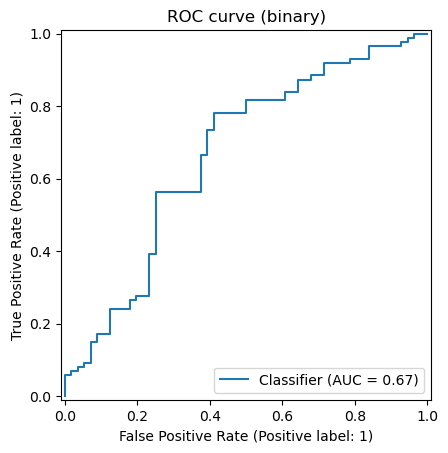

Balanced Accuracy: 0.6586617405582923
                  precision    recall  f1-score   support

Asymptomatic (0)       0.61      0.54      0.57        56
          PD (1)       0.72      0.78      0.75        87

        accuracy                           0.69       143
       macro avg       0.67      0.66      0.66       143
    weighted avg       0.68      0.69      0.68       143



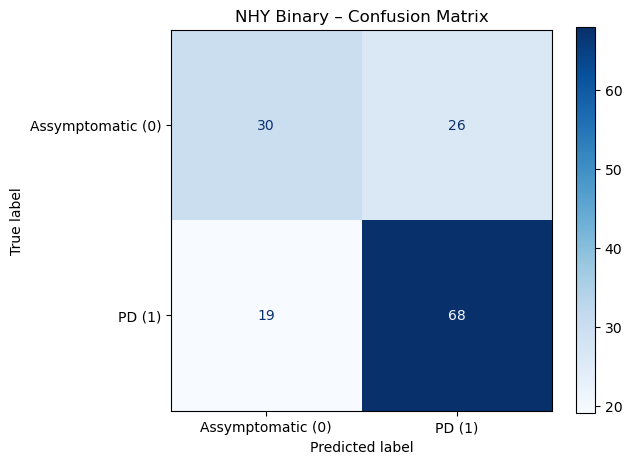

In [15]:

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]   
roc_auc = roc_auc_score(y_test, y_prob)

print(f"ROC-AUC: {roc_auc:.3f}")

# Optional: plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC curve (binary)")
plt.show()

# Evaluate
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Asymptomatic (0)", "PD (1)"]))

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Assymptomatic (0)", "PD (1)"], cmap="Blues")
plt.title("NHY Binary – Confusion Matrix")
plt.tight_layout()
plt.show()